In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
import requests
from io import StringIO
from pandas import DataFrame
import requests
from time import sleep

In [48]:
%matplotlib inline

In [44]:
def get_word(word):
  found = False
  while not found:
    req = requests.get(url="http://chronicle.nytlabs.com/graph?keyword={}&response_type=json".format(word))
    if req.status_code == requests.status_codes.codes.OKAY:
      df = pd.DataFrame.from_records(req.json())
      df = df.rename(columns={"total_articles_published": "Total", "article_matches": word})
      database = df[["Total", word, "year"]]
      return database
    else:
      print("We could not get the word '{}'\nsleeping for 10s ...".format(word))
      sleep(10)

In [45]:
def get_words(words):
  for i, word in enumerate(words):
    df = get_word(word)
    if i == 0:
      database = df
      continue
    df.drop("Total", 1, inplace=True)
    database = pd.merge(database, df, on="year", how="outer")
  database.set_index("year", inplace=True)
  values = database.values
  values = (database.values.T / database.Total.values).T
  values[:, 0] = database.Total.values
  database_norm = pd.DataFrame(data=values, columns=database.columns, index=database.index)
  database_norm.drop("Total", 1, inplace=True)
  return database_norm

In [46]:
data = get_words(["orange", "apple"])

We could not get the word 'orange'
sleeping for 10s ...


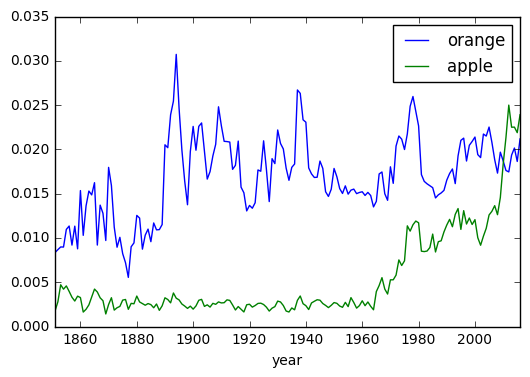

In [49]:
data.plot()